<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 35


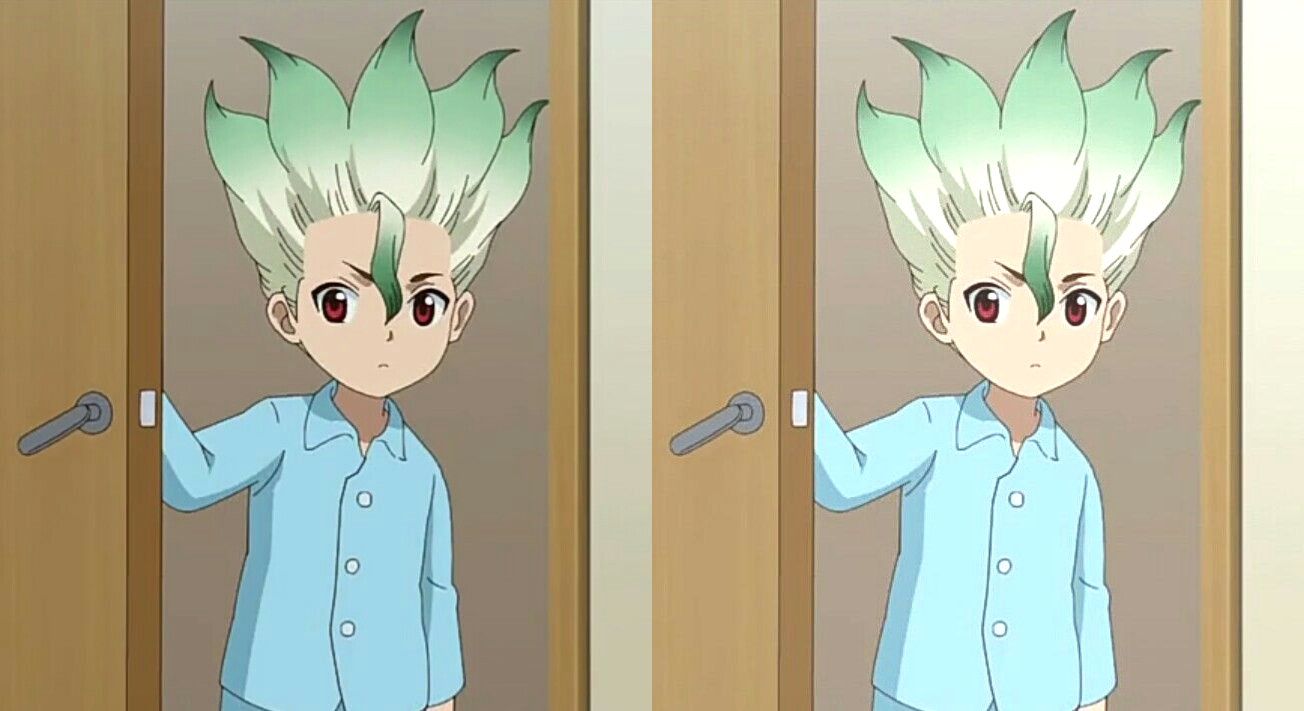

In [8]:
# Import library
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

# Pastikan path sesuai dengan lokasi gambar Anda
original = cv.imread('drive/MyDrive/PCVK_MM/Images/male.tiff')

if original is None:
    print("Gagal membaca file gambar. Periksa path file!")
else:
    # Transformasi linear brightness
    brightness_image = cv.convertScaleAbs(original, alpha=1, beta=brightness)

    # Gabungkan citra asli dan hasil transformasi berdampingan
    final_frame = cv.hconcat([original, brightness_image])

    # Tampilkan hasil
    cv2_imshow(final_frame)

# **Tugas**

1. Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:

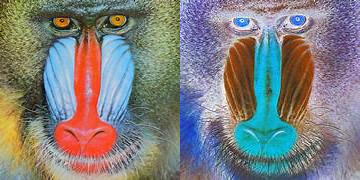

In [7]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Baca gambar
img = cv.imread('drive/MyDrive/PCVK_MM/Images/baboon.tiff')

# Invers citra
inverse_img = 255 - img

# Gabungkan
result = cv.hconcat([img, inverse_img])
cv2_imshow(result)

2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:

Mengubah tingkat kontras dan kecerahan citra
Masukkan kecerahan [-255 s/d 255]: 40
Masukkan kontras [1.0 - 3.0]: 2


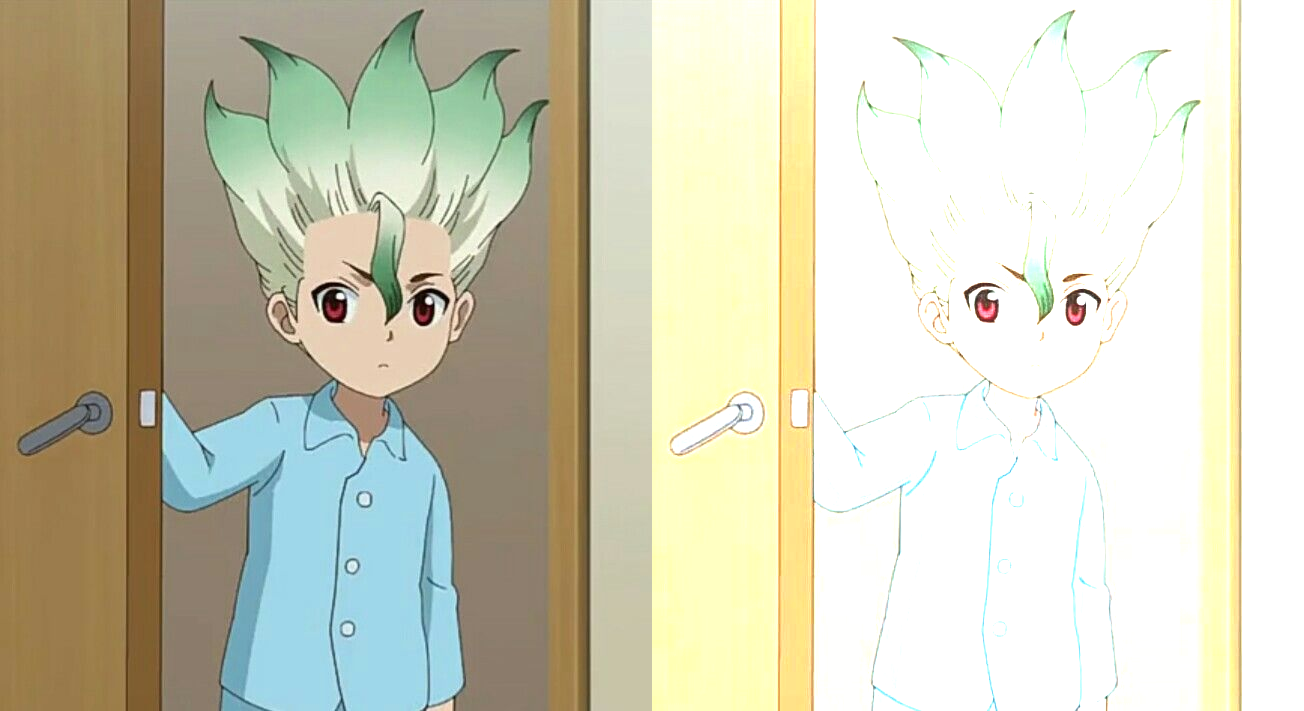

In [15]:
print("Mengubah tingkat kontras dan kecerahan citra")
brightness = int(input("Masukkan kecerahan [-255 s/d 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

img = cv.imread('drive/MyDrive/PCVK_MM/Images/male.tiff')

if img is None:
    print("Gagal membaca file gambar. Periksa path file!")
else:
    contrast_img = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)

    result = cv.hconcat([img, contrast_img])
    cv2_imshow(result)

4. Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output as follows :

a. Averaging

b. Lightness

c. Luminance

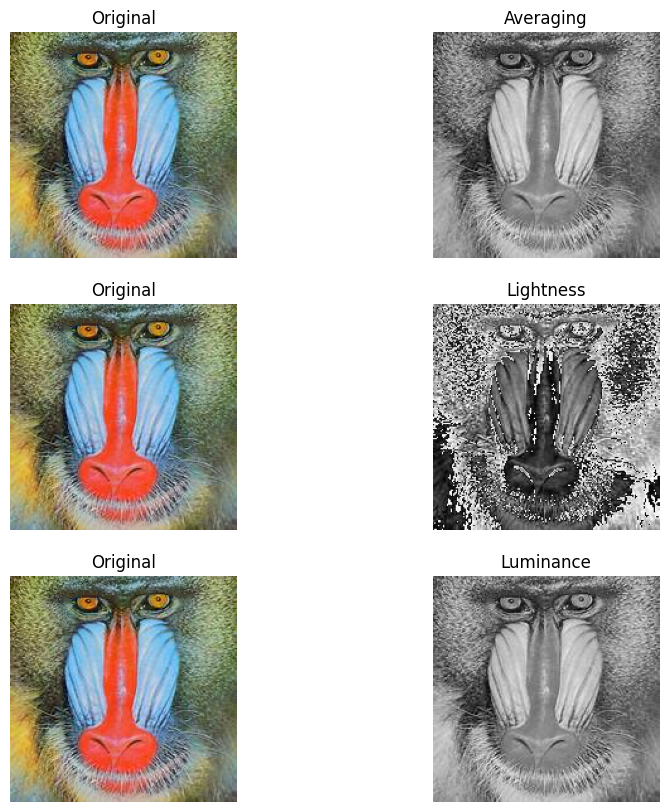

In [20]:
import matplotlib.pyplot as plt

img = cv.imread('drive/MyDrive/PCVK_MM/Images/baboon.tiff')

# Averaging
avg_gray = np.mean(img, axis=2).astype(np.uint8)

# Lightness
light_gray = ((np.max(img, axis=2) + np.min(img, axis=2)) / 2).astype(np.uint8)

# Luminance
lum_gray = (0.299*img[:,:,2] + 0.587*img[:,:,1] + 0.114*img[:,:,0]).astype(np.uint8)

# Tampilkan hasil
fig, axs = plt.subplots(3, 2, figsize=(10,10))

axs[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0,0].set_title("Original")
axs[0,1].imshow(avg_gray, cmap='gray')
axs[0,1].set_title("Averaging")

axs[1,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1,0].set_title("Original")
axs[1,1].imshow(light_gray, cmap='gray')
axs[1,1].set_title("Lightness")

axs[2,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[2,0].set_title("Original")
axs[2,1].imshow(lum_gray, cmap='gray')
axs[2,1].set_title("Luminance")

for ax in axs.ravel():
    ax.axis('off')

plt.show()

5. Show certain colors in the image , and change other colors to grayscale. For example , show the blue color in the image input and change the parts other which is not colored blue into grayscale as in the example below :**bold text**

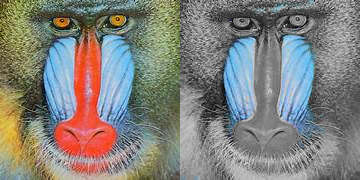

In [21]:
img = cv.imread('drive/MyDrive/PCVK_MM/Images/baboon.tiff')

# Konversi ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Deteksi warna biru (range HSV)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Gabungkan biru tetap, selain itu grayscale
custom_color = np.where(mask[:,:,None] == 255, img, gray_bgr)

# Tampilkan
result = cv.hconcat([img, custom_color])
cv2_imshow(result)